In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google = google.drop('Volume', axis = 1 )
google.head()

,Open,High,Low,Close
Date,,,,
2009-03-16,162.83,164.70,159.14,159.69
2009-03-17,159.93,167.50,159.39,167.50
2009-03-18,167.24,169.83,163.86,166.38
2009-03-19,165.67,167.83,163.53,164.81
2009-03-20,164.98,166.33,163.01,164.91


In [5]:
google['Ticks'] = range(0,len(google.index.values))

In [6]:

google.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,0
2009-03-17,159.93,167.50,159.39,167.50,1
2009-03-18,167.24,169.83,163.86,166.38,2
2009-03-19,165.67,167.83,163.53,164.81,3
2009-03-20,164.98,166.33,163.01,164.91,4


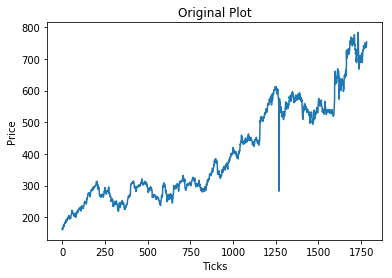

In [7]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data = google);

In [8]:
#sampling 1/10th of data
one_tenth = google.sample(frac = .1, random_state=np.random.randint(10))

In [9]:
one_tenth.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2014-02-13,589.78,599.35,589.24,599.35,1237
2011-03-01,308.58,309.30,299.35,300.08,493
2015-07-09,523.12,523.77,520.35,520.68,1589
2015-03-13,553.50,558.40,544.22,547.32,1508
2013-01-25,375.01,378.86,374.75,376.46,972


In [10]:
#reordering data values by ticks
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Open,High,Low,Close,Ticks
2009-03-18,167.24,169.83,163.86,166.38,2
2009-03-24,173.08,176.74,171.83,173.41,6
2009-04-21,187.90,191.96,187.86,190.54,25
2009-05-11,201.20,205.79,200.40,203.79,39
2009-06-09,219.07,220.03,215.66,217.59,59


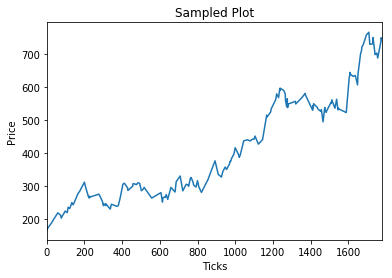

In [11]:
axes = one_tenth.plot('Ticks', 'Open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

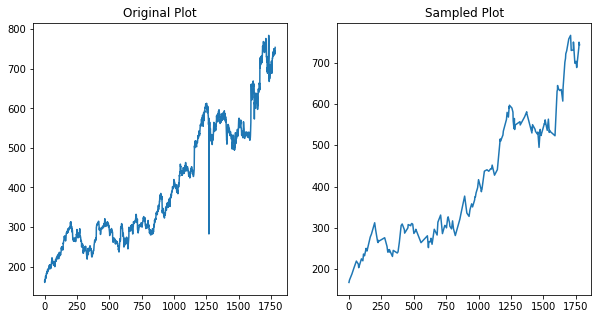

In [12]:
# plotting orignal data vs sample data
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');

In [13]:
# change the index from dates to ticks
#google.index = google['Ticks']
# Removing Index
google = google.reset_index()
google.head(3)

,Date,Open,High,Low,Close,Ticks
0,2009-03-16,162.83,164.70,159.14,159.69,0
1,2009-03-17,159.93,167.50,159.39,167.50,1
2,2009-03-18,167.24,169.83,163.86,166.38,2


In [14]:
#Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
google['Rolling_Mean'] = google['Open'].rolling(window = 80).mean()
google.head(5)

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
0,2009-03-16,162.83,164.70,159.14,159.69,0,NaN
1,2009-03-17,159.93,167.50,159.39,167.50,1,NaN
2,2009-03-18,167.24,169.83,163.86,166.38,2,NaN
3,2009-03-19,165.67,167.83,163.53,164.81,3,NaN
4,2009-03-20,164.98,166.33,163.01,164.91,4,NaN


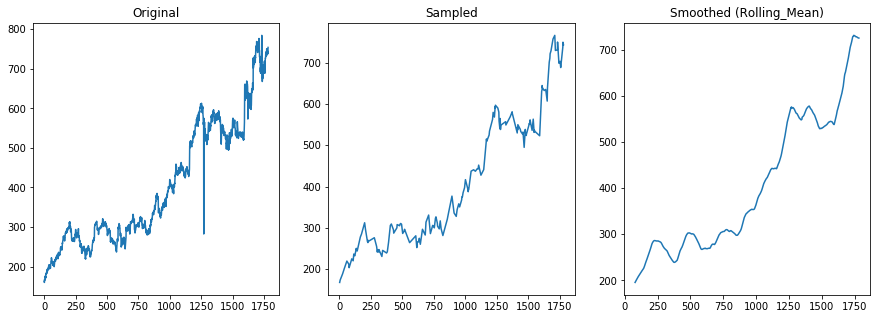

In [15]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling_Mean', data = google);
axes[2].set_title('Smoothed (Rolling_Mean)');

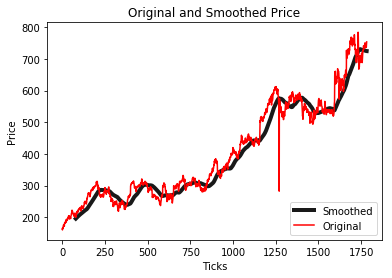

In [16]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(google['Ticks'], google['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(google['Ticks'], google['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

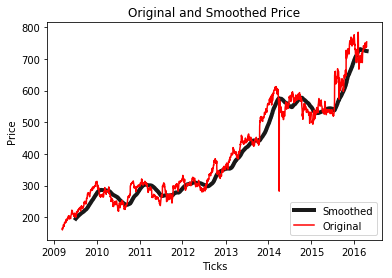

In [17]:
#Plotting Original Data and Smoothed Data on Same Plot, but with Date as x axis
# Almost exactly the code as above but with datetime
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(google['Date'], google['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(google['Date'], google['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [18]:
type(google['Date'].values[0])

numpy.datetime64

In [19]:
#Getting Data Only from Tick 800 to 1200
filt_google = google[(google['Ticks'] >= 800) & (google['Ticks'] <= 1200)]

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression().fit(filt_google[['Ticks']], filt_google[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print ('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.48 x +  -100.16


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [23]:
# using the equation of the line to get y values
predictions = model.predict(filt_google[['Ticks']])
predictions[0:5]

array([[ 280.99658148],
       [ 281.47302422],
       [ 281.94946697],
       [ 282.42590971],
       [ 282.90235246]])

In [24]:
# making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = filt_google.index.values, columns = ['Pred'])
predictions.head()

,Pred
800,280.996581
801,281.473024
802,281.949467
803,282.425910
804,282.902352


In [25]:
# join and concat documentation
# http://pandas.pydata.org/pandas-docs/stable/merging.html

joined_df = filt_google.join(predictions, how = 'inner')
joined_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean,Pred
800,2012-05-17,316.60,318.61,310.30,311.21,800,306.568375,280.996581
801,2012-05-18,312.24,315.89,298.05,299.90,801,306.865500,281.473024
802,2012-05-21,299.96,307.54,299.70,306.75,802,307.043750,281.949467
803,2012-05-22,306.41,306.60,297.70,300.10,803,307.310125,282.425910
804,2012-05-23,300.52,304.50,298.26,304.43,804,307.457375,282.902352


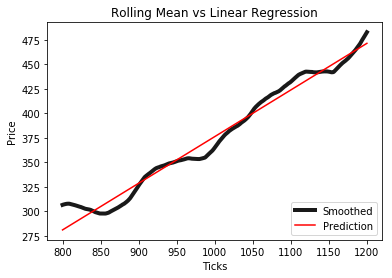

In [26]:

fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(joined_df['Ticks'], joined_df['Pred'], color = (1,0,0), label = 'Prediction');
ax.set_title('Rolling Mean vs Linear Regression')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [27]:
# documentation 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html+
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.97617654301753054